# Objectives
YWBAT
* list the assumptions of Linear Regression
* describe how to measure the assumptions of Linear Regression
* describe why multicollinearity is bad 
    * in terms of mathematics
    * in terms of the real world
* describe the purpose of linear regression


# Outline
* Setup a scenario
* Discuss the process of creating a linear regression model
    * go through the assumptions of linear regression

# Scenario
You're given some dataset with features `(f1, ..., fn)`and you are tasked with making a linear regression model that can estimate a target `y`.  

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm

from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [5]:
X, y = make_regression(n_samples=5000, n_features=10, n_informative=7, noise=4.0)
display(X)

df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(1, 11)])
df['target'] = y
df.head()

array([[-0.64982109, -0.29291603,  2.09204657, ...,  0.88183062,
        -0.42773428,  0.87640845],
       [ 1.75553951,  0.37392384, -0.30254375, ..., -0.92760873,
        -0.56305175,  2.11029937],
       [ 0.19316959, -1.54884584,  1.5583424 , ...,  1.17036733,
        -0.81105222, -0.83147852],
       ...,
       [ 1.04227349,  0.20055296,  0.81786667, ...,  0.33108845,
         0.25175137, -1.6691128 ],
       [-1.37833108,  0.37493769, -1.66177195, ...,  0.91376305,
         0.12783496, -0.11516026],
       [-0.51593522, -0.17972313,  0.2294458 , ..., -1.75015187,
        -0.25437027, -1.02881932]])

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.649821,-0.292916,2.092047,0.026549,1.924954,0.439432,2.313267,0.881831,-0.427734,0.876408,262.319806
1,1.755540,0.373924,-0.302544,0.074020,-0.037719,0.206213,0.041544,-0.927609,-0.563052,2.110299,92.138421
2,0.193170,-1.548846,1.558342,0.014457,0.964635,0.717452,-0.173301,1.170367,-0.811052,-0.831479,54.192645
3,-1.267264,1.269716,0.721461,-0.170047,2.528531,-1.905581,0.990580,-1.631194,2.106141,0.290009,94.251278
4,-0.216960,-1.601520,-1.915314,-0.511585,1.326657,-0.945555,1.103824,0.502640,-0.326703,-2.645094,54.716057


# In Linear Regression what is the formula that we use to predict the target, y_hat
linear algebra lowercase = vectors, scalars (some real number)

linear algebra uppercase = matrix


$$ \hat{y} = \beta_0f_0 + \beta_1f_1 + \beta_2f_2 + ... + \beta_n f_n$$

what is $\beta_0$ 
- the intercept
- the coefficient when x_vec = 1
- it's the value of $\hat{y}$ when all features = 0
- offset
- bias

In [6]:
# goal is to make a column of 1s
X_with_bias = sm.add_constant(X)
df_with_bias = pd.DataFrame(data=X_with_bias, columns=[f'feature_{i}' for i in range(0, 11)])
df_with_bias['target'] = y
df_with_bias.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,1.0,-0.649821,-0.292916,2.092047,0.026549,1.924954,0.439432,2.313267,0.881831,-0.427734,0.876408,262.319806
1,1.0,1.755540,0.373924,-0.302544,0.074020,-0.037719,0.206213,0.041544,-0.927609,-0.563052,2.110299,92.138421
2,1.0,0.193170,-1.548846,1.558342,0.014457,0.964635,0.717452,-0.173301,1.170367,-0.811052,-0.831479,54.192645
3,1.0,-1.267264,1.269716,0.721461,-0.170047,2.528531,-1.905581,0.990580,-1.631194,2.106141,0.290009,94.251278
4,1.0,-0.216960,-1.601520,-1.915314,-0.511585,1.326657,-0.945555,1.103824,0.502640,-0.326703,-2.645094,54.716057


# Let's break down the math of what is happening row by row

$\hat{y}$ is a vector

$\hat{y} = X\vec{\beta}$


In order to solve this for $\beta$ I need to know $(X^TX)^{-1}$

But not all inverses exist! 

In Linear Regression
* Multicollinearity will cause $(X^TX)$ to not have an inverse


Multicollinearity
* When a column (feature) can be predicted by the other columns (features) of the dataset

# Garbage In = Garbage Out

# What do we do if we have multicollinearity? 
* you can drop the column that is not linearly indepedent
* or you can make a new feature with that column combined with the other features and use that instead.
    * the 'other features' are the ones that can predict the column in question
* feature engineering - one of the most important things you can do as a data scientist

# let's do some modeling

In [7]:
def plot_corr(df):
    corr = df.corr().abs()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr, fmt='0.2g', annot=True, cmap=sns.color_palette('Blues'))
    plt.show()
    
    
# VIF test is a great test for multicollinearity
def calculate_vif(df, target_col, show_res=False):
    x = df.drop(columns=[target_col])
    y = df[target_col]
    ols = sm.OLS(y, x).fit()
    if show_res:
        display(ols.summary())
    vif = 1 / (1 - ols.rsquared)
    return vif

In [8]:
for col in df.drop(columns=['target']).columns:
    vif = calculate_vif(df=df.drop(columns=['target']), target_col=col, show_res=True)
    print(f"{col} has vif of {vif}")
    break

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              feature_1   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.180
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                       0.303
Time:                        21:58:37   Log-Likelihood:                         -7042.1
No. Observations:                5000   AIC:                                  1.410e+04
Df Residuals:                    4991   BIC:                                  1.416e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature_2      0.0074      0.014      0.517      0.605      -0.021       0.035
feature_3      0.0129      0.014      0.940      0.347      -0.014       0.040
feature_4      0.0193      0.014      1.381      0.167      -0.008       0.047
feature_5     -0.0145      0.014     -1.041      0.298      -0.042       0.013
feature_6      0.0006      0.014      0.040      0.968      -0.027       0.028
feature_7      0.0054      0.014      0.387      0.699      -0.022       0.033
feature_8     -0.0347      0.014     -2.469      0.014      -0.062      -0.007
feature_9     -0.0066      0.014     -0.471      0.638      -0.034       0.021
feature_10     0.0092      0.014      0.663      0.507      -0.018       0.036
==============================================================================
Omnibus:                        2.637   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.705
Skew:                          -0.020   Prob(JB):                        0.259
Kurtosis:                       3.107   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

feature_1 has vif of 1.0021285054703961


# Assumptions of Linear Regression
* that the features are linearly related to the target
* residuals have to be normally distributed
* residuals should not have autocorrelation (there shouldn't be a pattern)
    * homoskedasticity
    * standard deviation is independent of inputs and outputs
    * blob not cone
* no multicollinearity in feature space

# let's build a model and plot our residuals

In [9]:
def build_ols(df, target='target', add_constant=False):
    X = df.drop(columns=[target])
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X).fit()
    display(ols.summary())
    return ols

In [10]:
ols = build_ols(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.966e+05
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        21:58:41   Log-Likelihood:                         -14078.
No. Observations:                5000   AIC:                                  2.818e+04
Df Residuals:                    4990   BIC:                                  2.824e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature_1     51.1689      0.058    884.997      0.000      51.056      51.282
feature_2     10.4238      0.058    179.067      0.000      10.310      10.538
feature_3      0.0281      0.056      0.502      0.615      -0.082       0.138
feature_4      0.0227      0.057      0.396      0.692      -0.090       0.135
feature_5     54.1334      0.057    951.235      0.000      54.022      54.245
feature_6     65.0883      0.057   1135.463      0.000      64.976      65.201
feature_7     74.9771      0.057   1318.487      0.000      74.866      75.089
feature_8      2.9649      0.057     51.676      0.000       2.852       3.077
feature_9     29.8464      0.057    519.474      0.000      29.734      29.959
feature_10    -0.0121      0.057     -0.212      0.832      -0.123       0.099
==============================================================================
Omnibus:                        2.607   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.568
Skew:                           0.054   Prob(JB):                        0.277
Kurtosis:                       3.023   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

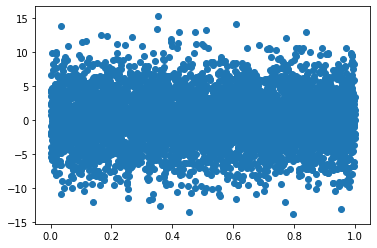

In [11]:
# plot residuals
residuals = ols.resid
x_axis = np.linspace(0, 1, len(residuals))

plt.scatter(x_axis, residuals)
plt.show()

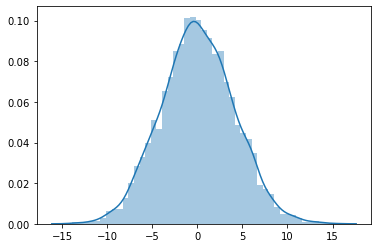

In [12]:
sns.distplot(residuals)
plt.show()

In [13]:
# How can we test that our residuals are normal? 
# H0: data is normal
# HA: data is not normal
scs.shapiro(residuals)

# p = 0.87 -> fail to reject the null, therefore residuals are normally distributed 

ShapiroResult(statistic=0.9996170401573181, pvalue=0.4614398181438446)

# Big Takeaways
* Multicollinearity is bad because it makes feature space garbage
    * why garbage? it makes it impossible to find an inverse of (X^TX)
* How do we measure Multicollinearity? VIF (high VIF is bad)
    * 1 / (1 - r2)
* What has to be true about residuals? 
    * normally distributed
    * blobby (heteroskeda....)